3309
HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64


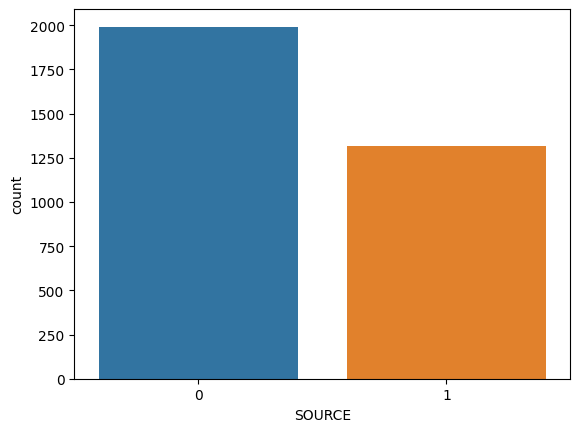

0    1992
1    1317
Name: SOURCE, dtype: int64
25    67
67    66
62    65
45    63
33    60
      ..
90     5
85     4
99     1
93     1
98     1
Name: AGE, Length: 95, dtype: int64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('training_set.csv')
print(df.shape[0])
print(df.isna().sum())

sns.countplot(df, x='SOURCE')
plt.show()

print(df['SOURCE'].value_counts())
print(df['AGE'].value_counts())

(59.8, 69.6]     533
(20.6, 30.4]     492
(50.0, 59.8]     452
(40.2, 50.0]     445
(30.4, 40.2]     439
(69.6, 79.4]     364
(0.902, 10.8]    201
(10.8, 20.6]     200
(79.4, 89.2]     156
(89.2, 99.0]      27
Name: AGE, dtype: int64


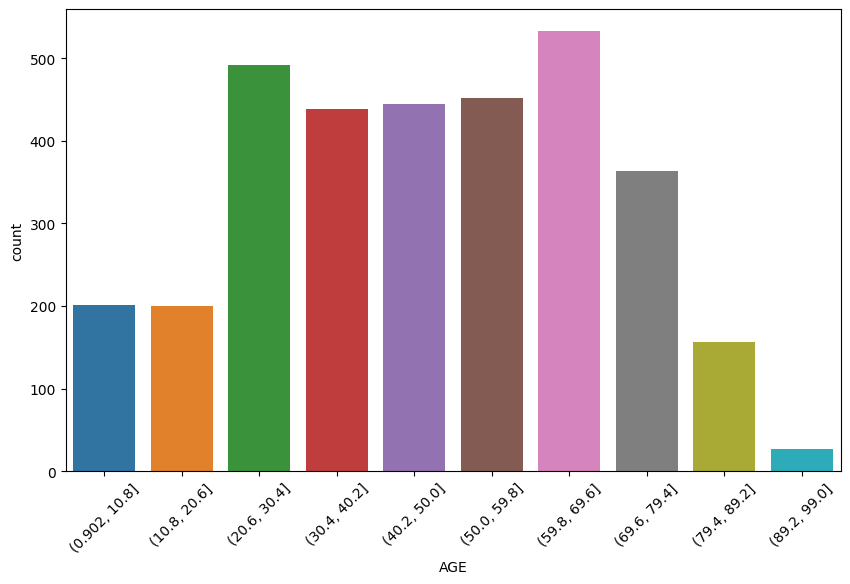

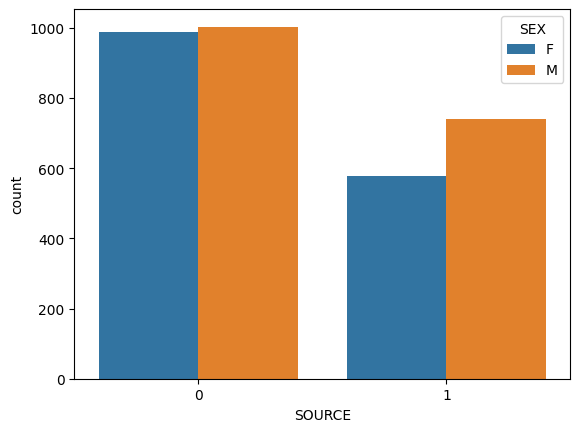

In [2]:
df_bin = df.copy()
df_bin['AGE'] = pd.cut(df['AGE'], bins=10)
print(df_bin['AGE'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df_bin, x='AGE')
plt.xticks(rotation = 45)
plt.show()

sns.countplot(df_bin, x='SOURCE', hue='SEX')
plt.show()

M    740
F    577
Name: SEX, dtype: int64


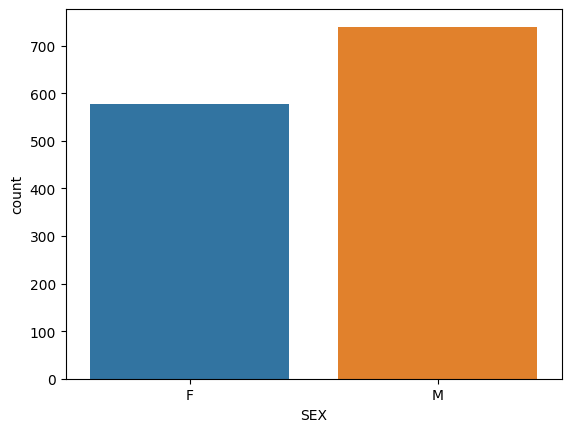

In [3]:
df_sick = df[df['SOURCE'] == 1]
print(df_sick['SEX'].value_counts())
sns.countplot(df_sick, x='SEX')
plt.show()

In [4]:
df_bin.pivot_table(index=['AGE'], columns=['SEX'])['SOURCE']

SEX,F,M
AGE,,
"(0.902, 10.8]",0.427083,0.247619
"(10.8, 20.6]",0.282609,0.444444
"(20.6, 30.4]",0.275304,0.363265
"(30.4, 40.2]",0.333333,0.293839
"(40.2, 50.0]",0.406699,0.406780
"(50.0, 59.8]",0.435233,0.467181
"(59.8, 69.6]",0.380165,0.508591
"(69.6, 79.4]",0.352941,0.492891
"(79.4, 89.2]",0.421687,0.589041


Predizione decision tree Test: 0.6518585675430644 Train: 1.0


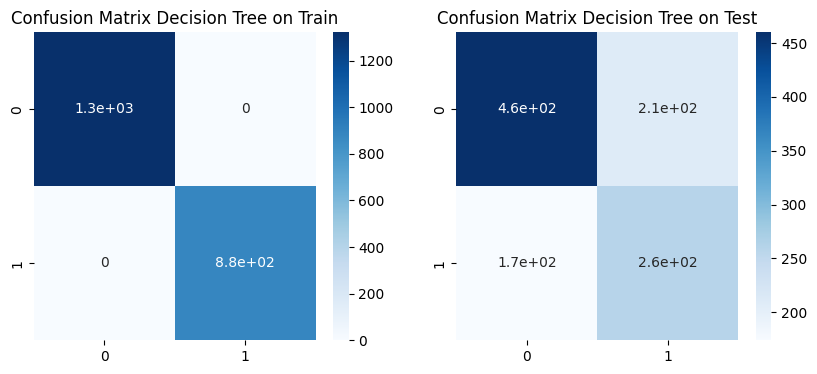

Predizione decision logistic Test: 0.7207615593834995 Train: 0.7112420670897552


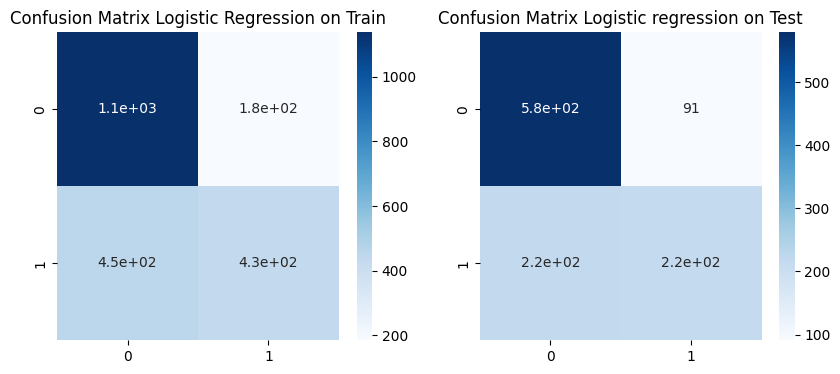

Predizione decision dummy Test: 0.6074342701722575 Train: 0.599274705349048


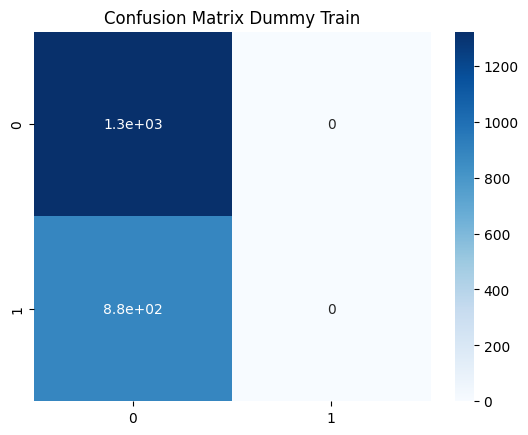

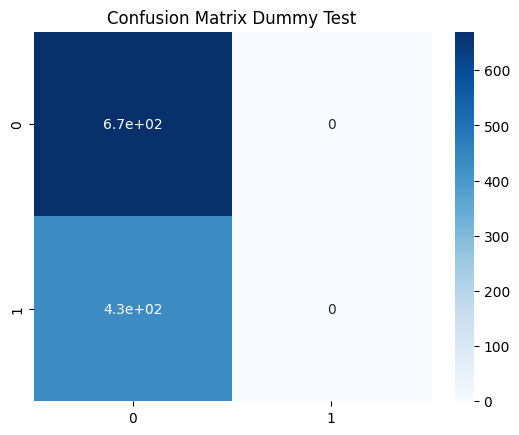

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
warnings.filterwarnings('ignore')

df = pd.read_csv('training_set.csv')
X = df.drop('SOURCE', axis=1)
y = df['SOURCE']

enc = OrdinalEncoder()
df_num = enc.fit_transform(X)

X = pd.DataFrame(df_num, columns=enc.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=1/3, random_state=0)

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

test_pred = tree.predict(X_test)
train_pred = tree.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix Decision Tree on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix Decision Tree on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred), annot=True, cmap='Blues', ax=axes[1])
plt.show()

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

test_pred1 = logreg.predict(X_test)
train_pred1 = logreg.predict(X_train)
print(f'Predizione decision logistic Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')

fig, axes = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
axes[0].set_title('Confusion Matrix Logistic Regression on Train')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred1), annot=True, cmap='Blues', ax=axes[0])
axes[1].set_title('Confusion Matrix Logistic regression on Test')
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred1), annot=True, cmap='Blues', ax=axes[1])
plt.show()

dummy = DummyClassifier()

dummy.fit(X_train, y_train)

test_pred2 = dummy.predict(X_test)
train_pred2 = dummy.predict(X_train)
print(f'Predizione decision dummy Test: {accuracy_score(y_test, test_pred2)} Train: {accuracy_score(y_train, train_pred2)}')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=train_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Train')
plt.show()
sns.heatmap(confusion_matrix(y_true=y_test, y_pred=test_pred2), annot=True, cmap='Blues')
plt.title('Confusion Matrix Dummy Test')
plt.show()

In [6]:
print('Accuracy Decision Tree con Cross Val ',cross_val_score(tree, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Logistic Regression con Cross Val ',cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean())
print('Accuracy Dummy con Cross Val ',cross_val_score(dummy, X, y, cv=5, scoring='accuracy').mean())

Accuracy Decision Tree con Cross Val  0.6603242363716972
Accuracy Logistic Regression con Cross Val  0.7177420460622238
Accuracy Dummy con Cross Val  0.6019945975839958


In [7]:
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['gini', 'entropy', 'log_loss', None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2,4,5]
    }

gs = GridSearchCV(tree, param_grid=param, scoring='accuracy')

gs.fit(X_train,y_train)
test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs.best_params_)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 5}
Predizione decision tree Test: 0.6591115140525838 Train: 0.9623753399818676


In [8]:
from sklearn.preprocessing import KBinsDiscretizer, MaxAbsScaler
from sklearn.compose import ColumnTransformer

trasformers = [
    ('discr', KBinsDiscretizer(n_bins=10), ['AGE','THROMBOCYTE'])
]

ct = ColumnTransformer(trasformers, remainder='passthrough')

Xbin = ct.fit_transform(X)

scaler = MaxAbsScaler()
Xs = scaler.fit_transform(Xbin)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y , test_size=1/3, random_state=0)

tree = DecisionTreeClassifier()

tree.fit(Xs_train, y_train)

test_pred = tree.predict(Xs_test)
train_pred = tree.predict(Xs_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

logreg = LogisticRegression()

logreg.fit(Xs_train, y_train)

test_pred1 = logreg.predict(Xs_test)
train_pred1 = logreg.predict(Xs_train)
print(f'Predizione decision logistic Test: {accuracy_score(y_test, test_pred1)} Train: {accuracy_score(y_train, train_pred1)}')

Predizione decision tree Test: 0.642792384406165 Train: 1.0
Predizione decision logistic Test: 0.7388939256572983 Train: 0.7479601087941976


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

trasformers = [
    ('discr1', KBinsDiscretizer(n_bins=10), ['THROMBOCYTE']),
    ('discr2', KBinsDiscretizer(n_bins=4),  ['AGE'])
]

ct1 = ColumnTransformer(trasformers, remainder='passthrough')

prepo = Pipeline(steps=[
    ('ct1', ct1),
    ('scaler', MaxAbsScaler()),
    ('norm', Normalizer())
])

prepo.fit(X,y)
model = DecisionTreeClassifier()

pipe = Pipeline(steps=[
    ('prepo', prepo),
    ('model', model)
])
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

Predizione decision tree Test: 0.6591115140525838 Train: 1.0


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

params = {
    'model': LinearRegression()
}
pipe.set_params(**params)
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)
print(f'Predizione linear regression Test: {mean_absolute_error(y_test, test_pred)} Train: {mean_absolute_error(y_train, train_pred)}')

Predizione linear regression Test: 0.3697799491023521 Train: 0.3734442042896706


In [11]:
params = {
    'model': DecisionTreeClassifier()
}
pipe.set_params(**params)

param = {
    'model__criterion': ['gini', 'entropy', 'log_loss', None],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_split': [2,4,5]
    }
gs = GridSearchCV(pipe, param_grid=param, scoring='accuracy')
gs.fit(X_train,y_train)

test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs.best_params_)
print(f'Predizione decision tree Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

param1 = {
    'model__fit_intercept':[True, False]
}

params = {
    'model': LinearRegression()
}
pipe.set_params(**params)

gs1 = GridSearchCV(pipe, param_grid=param1, scoring='neg_mean_absolute_error')
gs1.fit(X_train,y_train)

test_pred = gs.predict(X_test)
train_pred = gs.predict(X_train)
print(gs1.best_params_)
print(f'Predizione Linear Regression Test: {accuracy_score(y_test, test_pred)} Train: {accuracy_score(y_train, train_pred)}')

{'model__criterion': 'gini', 'model__max_features': 'log2', 'model__min_samples_split': 5}
Predizione decision tree Test: 0.6636446056210336 Train: 0.956029011786038
{'model__fit_intercept': True}
Predizione Linear Regression Test: 0.6636446056210336 Train: 0.956029011786038


In [12]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer

def identity(X):
  return X

Identity = FunctionTransformer(identity, validate=True)

union = FeatureUnion(transformer_list=[
        ("pca", PCA(n_components=2)),
        ("svd", SelectKBest(score_func=chi2,k=2)),
        ("allelse", Identity)
        ])

X_features = union.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")

prepo1 = Pipeline(steps=[
    ('union', union),
    ('ct1', ct1),
    ('scaler', MaxAbsScaler()),
    ('norm', Normalizer())
])

Combined space has 14 features
